In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split,StratifiedKFold, cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import os

In [142]:
# Load the data
df=None
if os.path.exists("bank-additional-full.csv"):
    print("Loading dataset from the local storage...")
    df=pd.read_csv("bank-additional-full.csv", sep=";")
else:
    print("Dataset unavailable! Loading from the Internet...")
    df=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv',sep=";")
    print("Saving dataset in the local storage")
    df.to_csv("bank-additional-full.csv", sep=";", index=False)
    print("Saved")

Loading dataset from the local storage...


In [143]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [144]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [145]:
categoric_cols=["job","marital","education","contact","month","day_of_week","poutcome","default","housing","loan","y"]

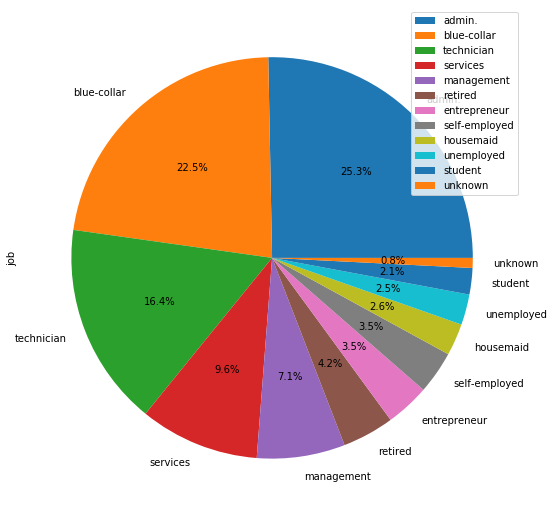

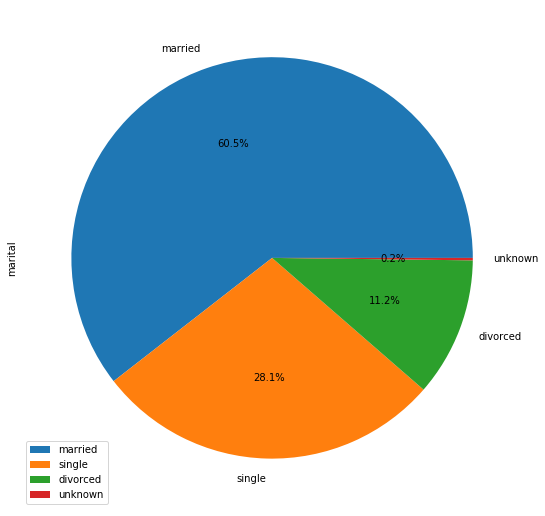

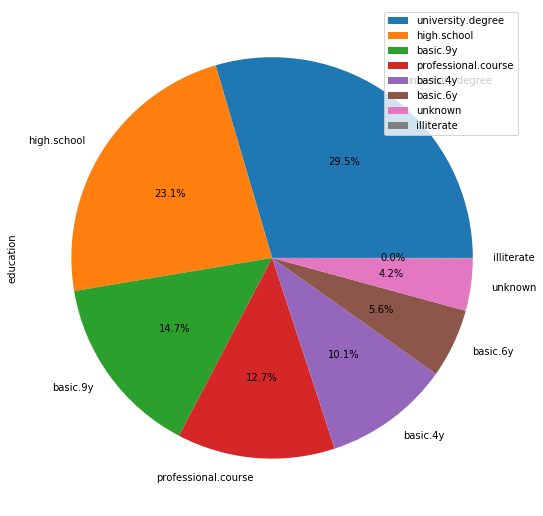

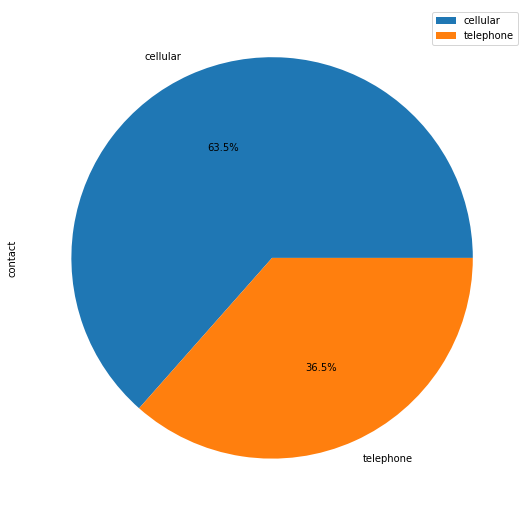

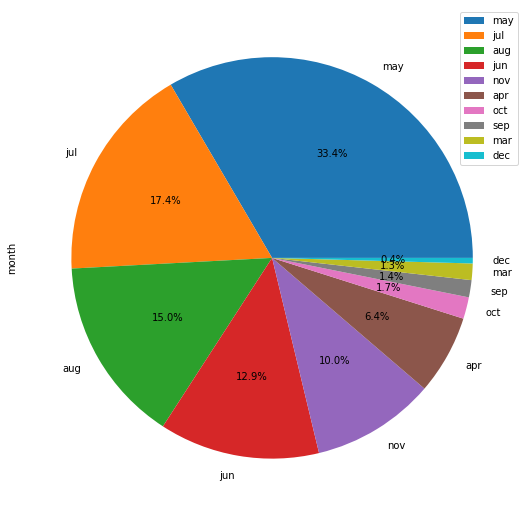

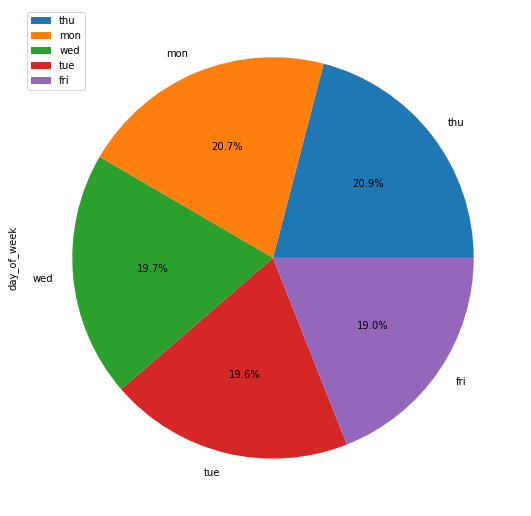

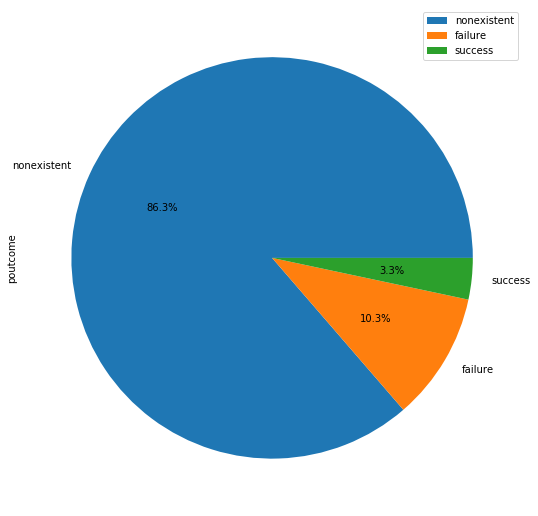

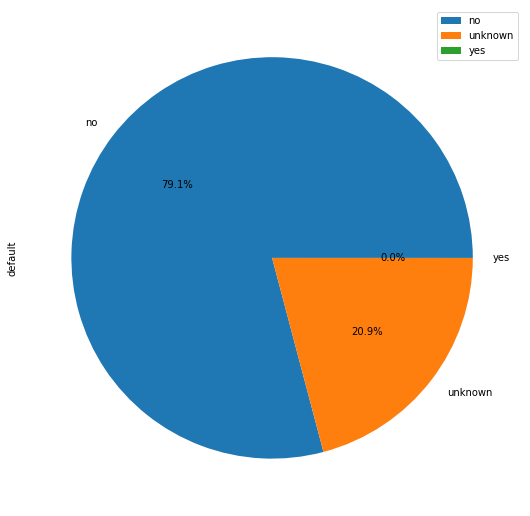

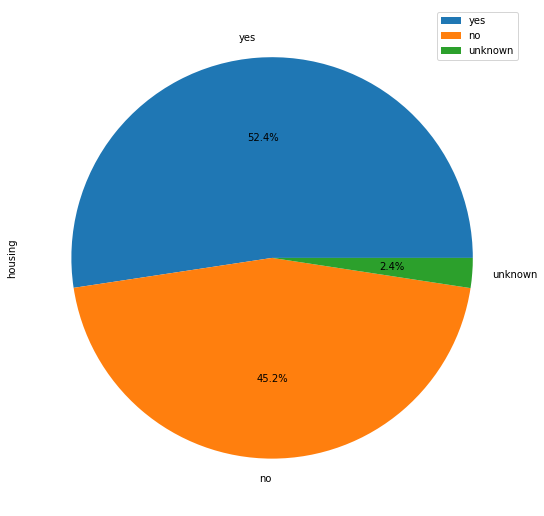

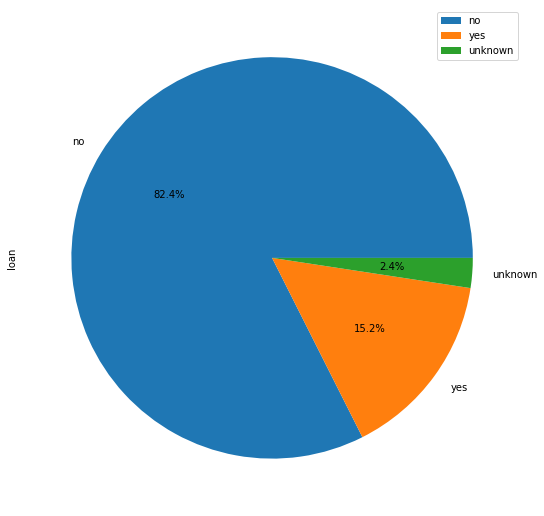

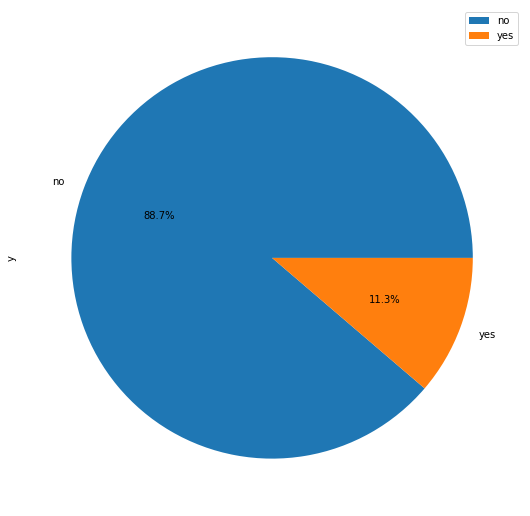

In [146]:
for col in categoric_cols:
  df[[col]].apply(pd.value_counts).plot(kind="pie",figsize=(25,120),layout=(11,1),subplots=True, autopct='%1.1f%%')

In [147]:
df[["job"]] = df[["job"]].apply(LabelEncoder().fit_transform)
df[["marital"]] = df[["marital"]].apply(LabelEncoder().fit_transform)
df[["education"]] = df[["education"]].apply(LabelEncoder().fit_transform)
df[["contact"]] = df[["contact"]].apply(LabelEncoder().fit_transform)
df[["month"]] = df[["month"]].apply(LabelEncoder().fit_transform)
df[["day_of_week"]] = df[["day_of_week"]].apply(LabelEncoder().fit_transform)
df[["poutcome"]] = df[["poutcome"]].apply(LabelEncoder().fit_transform)
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)




In [148]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,no,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,unknown,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,no,yes,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,no,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,no,no,yes,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,no,yes,no,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,no,no,no,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,no,yes,no,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,no,no,no,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [149]:
df=df.drop(columns="duration")

In [150]:

df=df.dropna()

In [151]:
df_1=pd.get_dummies(df.drop(columns="y"))
df_1["y"]=df["y"]
df=df_1

In [152]:
df

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,...,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,y
0,56,3,1,0,1,6,1,1,999,0,...,1,0,0,1,0,0,1,0,0,0
1,57,7,1,3,1,6,1,1,999,0,...,0,1,0,1,0,0,1,0,0,0
2,37,7,1,3,1,6,1,1,999,0,...,1,0,0,0,0,1,1,0,0,0
3,40,0,1,1,1,6,1,1,999,0,...,1,0,0,1,0,0,1,0,0,0
4,56,7,1,3,1,6,1,1,999,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,7,0,1,999,0,...,1,0,0,0,0,1,1,0,0,1
41184,46,1,1,5,0,7,0,1,999,0,...,1,0,0,1,0,0,1,0,0,0
41185,56,5,1,6,0,7,0,2,999,0,...,1,0,0,0,0,1,1,0,0,0
41186,44,9,1,5,0,7,0,1,999,0,...,1,0,0,1,0,0,1,0,0,1


In [153]:
# all_other_cols=np.intersect1d(categoric_cols,df.columns, assume_unique=True)
# all_other_cols=all_other_cols.tolist().remove("y")
all_other_cols=np.intersect1d(categoric_cols,df.columns, assume_unique=True)

In [154]:
all_other_cols

array(['contact', 'day_of_week', 'education', 'job', 'marital', 'month',
       'poutcome', 'y'], dtype=object)

In [155]:
all_other_cols=all_other_cols.tolist()

In [156]:
all_other_cols

['contact',
 'day_of_week',
 'education',
 'job',
 'marital',
 'month',
 'poutcome',
 'y']

In [157]:
all_other_cols.remove("y")

In [158]:
all_other_cols

['contact', 'day_of_week', 'education', 'job', 'marital', 'month', 'poutcome']

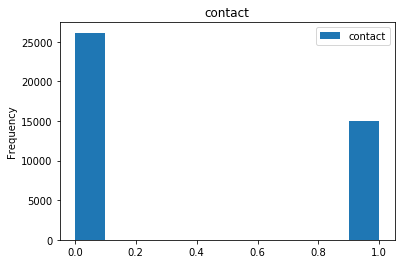

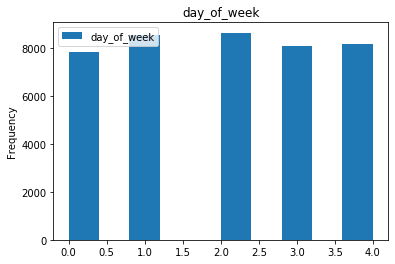

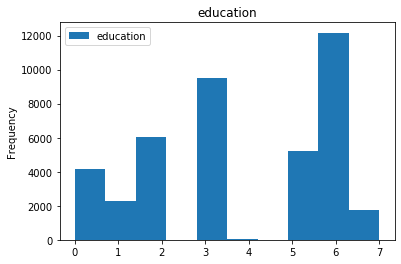

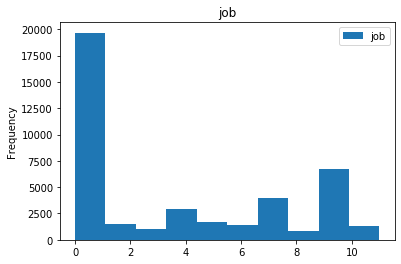

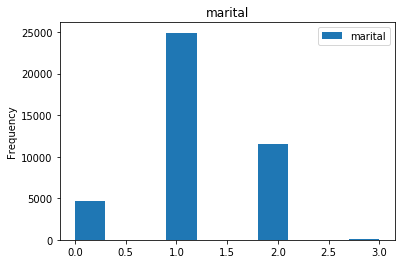

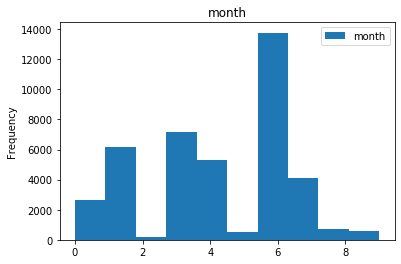

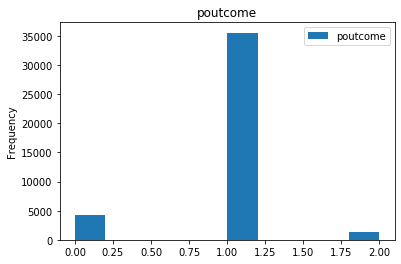

In [159]:
for item in all_other_cols:
  df[[item]].plot.hist(title =item)

In [160]:
X=df.drop(columns="y")
Y=df["y"]

In [161]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [162]:
share=df["y"].value_counts()[1]/df["y"].value_counts()[0]

In [163]:
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [164]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
# undersample = RandomUnderSampler(sampling_strategy="majority")
# X, Y = undersample.fit_resample(X, Y)

In [165]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=50,stratify=Y)

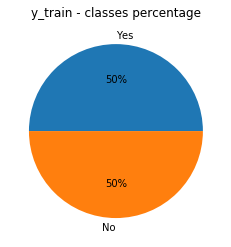

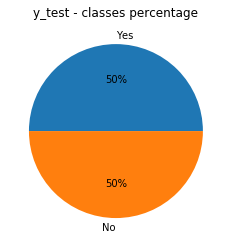

In [166]:
plt.pie(np.unique(y_train, return_counts=True)[1],labels={"Yes":1, "No":0},autopct='%1.0f%%')
plt.title(label="y_train - classes percentage")
plt.show()
plt.pie(np.unique(y_test, return_counts=True)[1],labels={"Yes":1, "No":0}, autopct='%1.0f%%')
plt.title(label="y_test - classes percentage")
plt.show()



In [167]:
dummy_clf = DummyClassifier(strategy='stratified')
forest_clf = RandomForestClassifier(n_estimators=200,max_depth=12, random_state=60)

In [168]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
print(np.mean(cross_val_score(dummy_clf,X_train,y_train,cv=kfold,n_jobs=-1, verbose=1, scoring="f1")))
val_f1_score = np.mean(cross_val_score(forest_clf,X_train,y_train,cv=kfold,n_jobs=-1, verbose=1, scoring="f1"))
val_f1_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.49732972537856635


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


0.8850705055697425

In [169]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=60)

In [170]:
y_predict=forest_clf.predict(X_test)

In [171]:
test_f1_score=f1_score(y_predict,y_test)

In [172]:
generalisation_error= val_f1_score-test_f1_score

In [173]:
generalisation_error

-0.0002522239623173883

In [174]:
features=df.drop(["y"],axis=1).columns

[15 14 11 19 21  4 13 16 12 17 22 24 10  8  0  7  5  9 20 23  6  1  3  2
 18]
Feature ranking:
1. nr.employed (0.129976)
2. euribor3m (0.125756)
3. emp.var.rate (0.083075)
4. housing_no (0.072122)
5. housing_yes (0.069402)
6. contact (0.056848)
7. cons.conf.idx (0.050349)
8. default_no (0.049017)
9. cons.price.idx (0.042543)
10. default_unknown (0.036539)
11. loan_no (0.033802)
12. loan_yes (0.032326)
13. poutcome (0.027954)
14. pdays (0.026960)
15. age (0.024649)
16. campaign (0.020971)
17. month (0.019871)
18. previous (0.018763)
19. housing_unknown (0.014544)
20. loan_unknown (0.014403)
21. day_of_week (0.014015)
22. job (0.013981)
23. education (0.013284)
24. marital (0.008787)
25. default_yes (0.000063)


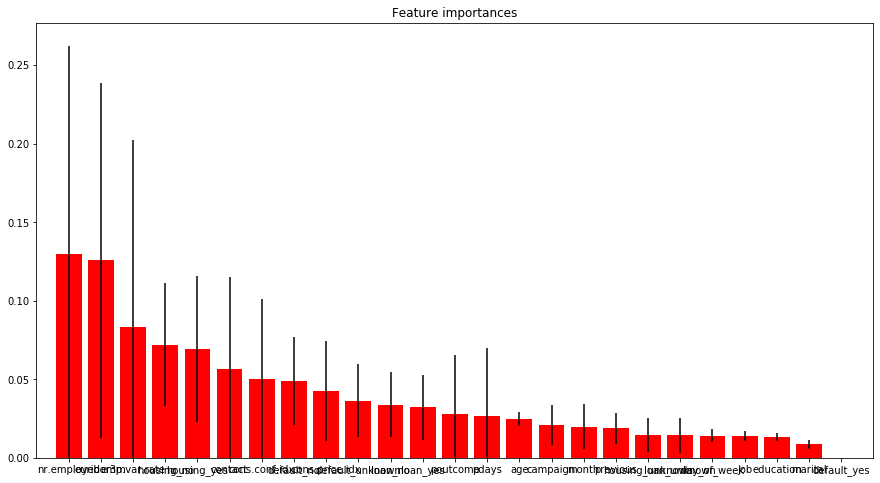

In [175]:
importances = forest_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

In [29]:
params_forest={"n_estimators":[10,100],"max_depth":[30,35,40,45],"min_samples_split":[2, 5, 10],"min_samples_leaf":[1, 2, 5, 10]}

In [30]:
grid_forest=GridSearchCV(forest_clf,param_grid=params_forest,scoring="accuracy",n_jobs=-1,return_train_score=True,verbose=1,refit=True, cv=kfold)

In [31]:
grid_forest

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(max_depth=3), n_jobs=-1,
             param_grid={'max_depth': [30, 35, 40, 45],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [32]:
grid_forest.fit(X_train,y_train)
# forest_clf.fit(X_train,y_test)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(max_depth=3), n_jobs=-1,
             param_grid={'max_depth': [30, 35, 40, 45],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [33]:
forest_clf=grid_forest.best_estimator_
print(grid_forest.best_params_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
grid_forest.best_score_

0.9263981829032067

In [37]:
# TODO: gridsearhccv -add right params
# SMOTE try to add

In [38]:
dummy_clf.fit(X_train, y_train)
y_predict=dummy_clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score as acc

In [40]:
acc(y_predict,y_test)

0.501805844369049

In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(y_predict,y_test)

0.500054914881933

In [43]:
y_predict=forest_clf.predict(X_test)

In [44]:
test_acc= acc(y_predict,y_test)

In [45]:
f1_score(y_predict,y_test)

0.927233091420845

In [46]:
len(df)

41188

In [47]:
generalisation_error= grid_forest.best_score_-test_acc

In [48]:
generalisation_error

-0.00145012616979312

In [49]:
# "Validation curve"